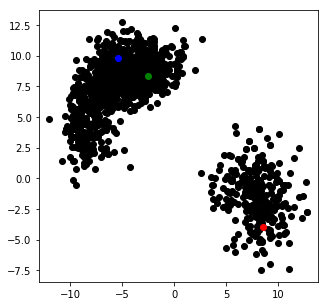

      x     y  distance_from_1  distance_from_2  distance_from_3  closest  \
0 -2.35  9.46        17.267081         1.126144         3.051311        2   
1 -2.07  9.51        17.131100         1.251599         3.324485        2   
2 -2.54  8.35        16.547220         0.000000         3.197890        2   
3 -2.69  9.76        17.714483         1.417956         2.690669        2   
4 -9.23  5.64        20.187850         7.218047         5.682860        3   

  color  
0     g  
1     g  
2     g  
3     g  
4     b  


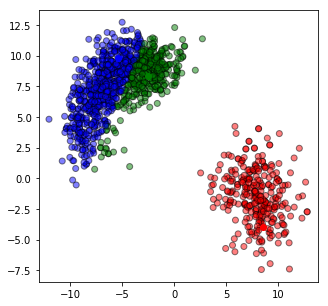

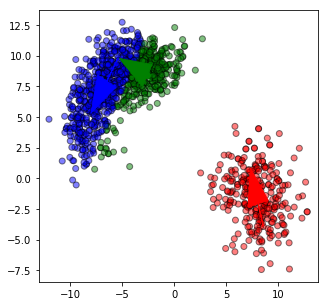

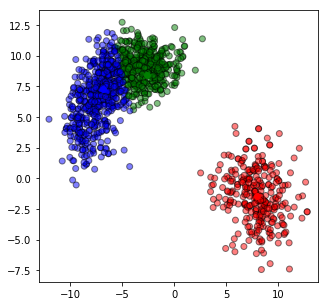

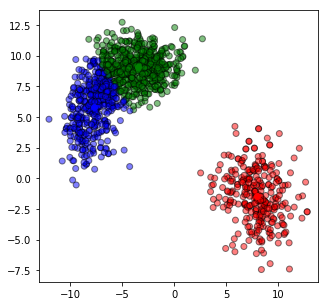

In [63]:
## Initialisation
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_noah.csv', usecols=['x', 'y'])

# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
#     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
# })

plotx_min = min(df['x']) - 1
plotx_max = max(df['x']) + 1
ploty_min = min(df['y']) - 1
ploty_max = max(df['y']) + 1
np.random.seed(200)
k = 3
# centroids[i] = [x, y]

centroids = {
    i+1: [df['x'][entry], df['y'][entry]]
    for i, entry in enumerate(random.sample(list(i+1 for i in range(len(df['x']))), k))
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()


## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()


## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()


## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()


# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()

In [64]:
# find nearest value
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [65]:
centroids.keys()

dict_keys([1, 2, 3])

In [66]:
## k-means by pitch_type

df = pd.read_csv('data_noah.csv', usecols=['x', 'y', 'pitch_type'])

# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
#     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
# })

In [67]:
centroids

{1: [7.891528239202658, -1.448737541528239],
 2: [-3.4541778523489928, 9.07719798657718],
 3: [-7.698372641509433, 5.785094339622642]}

In [68]:
df.groupby(['pitch_type']).describe(percentiles=[])

x                                              y            \
            count      mean       std    min   50%    max  count      mean   
pitch_type                                                                   
CH          162.0 -8.337901  1.282468 -12.02 -8.54  -4.28  162.0  3.914444   
CU          301.0  7.891528  1.822143   2.53  7.96  12.75  301.0 -1.448738   
FF          858.0 -4.629441  2.411702 -10.52 -4.63   2.70  858.0  8.425117   

                                         
                 std   min   50%    max  
pitch_type                               
CH          1.612159 -0.55  4.01   8.58  
CU          2.161440 -7.45 -1.50   4.23  
FF          1.573431  3.40  8.57  12.72

In [69]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [df['x'][entry], df['y'][entry]]
    for i, entry in enumerate(random.sample(list(i+1 for i in range(len(df['x']))), k))
}



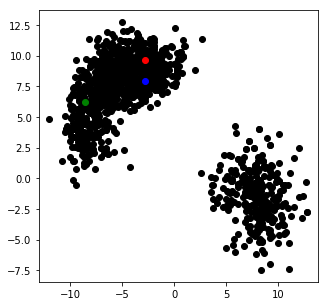

In [70]:
plotx_min = min(df['x']) - 1
plotx_max = max(df['x']) + 1
ploty_min = min(df['y']) - 1
ploty_max = max(df['y']) + 1

    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: '#FF8888', 2: '#77FF00', 3: '#5599FF'}
centermap =  {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=centermap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()

      x     y pitch_type  distance_from_1  distance_from_2  distance_from_3  \
0 -2.35  9.46         FF         0.500899         7.026763         1.619136   
1 -2.07  9.51         FF         0.749533         7.298637         1.771017   
2 -2.54  8.35         FF         1.355175         6.407901         0.530094   
3 -2.69  9.76         FF         0.136015         6.877107         1.846943   
4 -9.23  5.64         CH         7.593846         0.864523         6.775161   

   closest    color  
0        1  #FF8888  
1        1  #FF8888  
2        3  #5599FF  
3        1  #FF8888  
4        2  #77FF00  


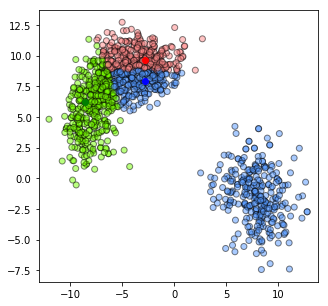

In [71]:

## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=centermap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()




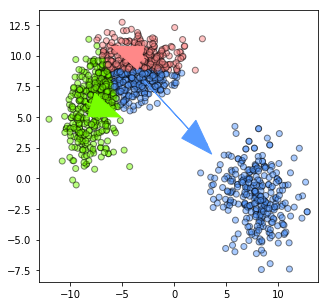

In [72]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()


In [73]:
## Repeat Assigment Stage

df = assignment(df, centroids)

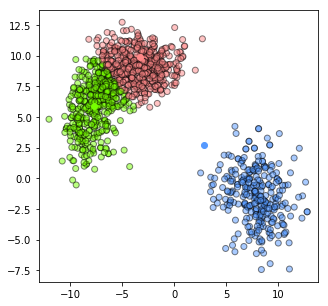

In [74]:
# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()

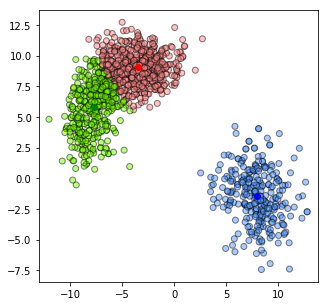

In [75]:

# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=centermap[i])
plt.xlim(plotx_min, plotx_max)
plt.ylim(ploty_min, ploty_max)
plt.show()